In [1]:
from utils import get_inputs_tags, normalize
import os
import numpy as np
# from sklearn.model_selection import train_test_split
from utils import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
img_dir = '/Users/risan/Desktop/homework/2019机器学习大作业/AR/AR' # 存放图片的文件夹

inputs, tags = get_inputs_tags(img_dir)

num_tags = len(set(tags))   # 120
# train_x, test_x, train_y, test_y = train_test_split(inputs, tags, test_size=0.2, shuffle=None)
train_x, test_x, train_y, test_y = train_test_split(inputs, tags, test_size=0.2)

In [3]:
# 测试数据
print(num_tags)
print(inputs.shape)
print(tags.shape)
print(train_x.shape)    
print(train_y.shape)
print(test_x.shape)     
print(test_y.shape) 

120
(1680, 50, 40)
(1680,)
(1320, 50, 40)
(1320,)
(360, 50, 40)
(360,)


In [4]:
n_sample, h, w = train_x.shape
X = np.reshape(train_x, [n_sample, -1]) # convert img_mat => img_array
X_ = np.reshape(test_x, [test_x.shape[0], -1])

## 调节PCA压缩维度，观察维度对准确率的影响

In [5]:
n_components = 2000 # dimention after pca
component_acc_dict = {}
for cmpnt in range(1, n_components+1):
    pca = PCA(n_components=cmpnt, svd_solver='randomized', whiten=True, copy=True)
    pca.fit(X)
    X_pca = pca.transform(X)     # 执行pca变换得到的特征 
    X_test_pca = pca.transform(X_)     
    X_pca_norm = normalize(X_pca)     # 归一化
    X_test_pca_norm = normalize(X_test_pca)    # 归一化
    ans = np.matmul(X_pca_norm, X_test_pca_norm.T)    # cosine 相似度
    ans = np.argmax(ans, axis=0)
    pred = []
    for a in ans:
        pred.append(train_y[a])
    acc = np.mean(np.equal(pred, test_y).astype(np.float32))
#     print(acc)
    component_acc_dict[cmpnt] = acc

## 压缩维度和准确率的散点图

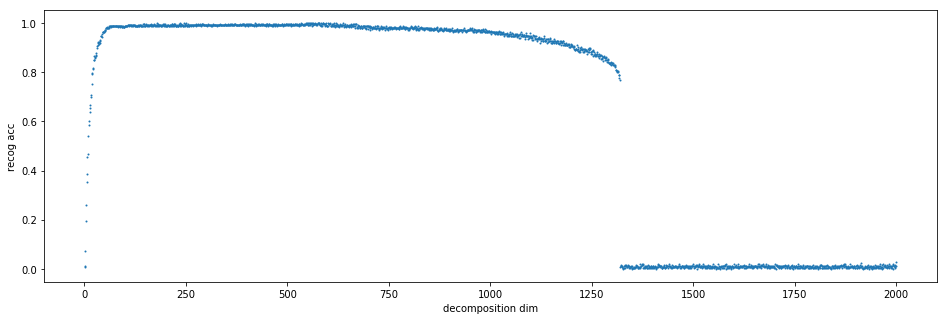

In [9]:
fig, axes = plt.subplots(figsize=(16,5))

axes.set_xlabel('decomposition dim')
axes.set_ylabel('recog acc')
dims = component_acc_dict.keys()
acc = component_acc_dict.values()
axes.scatter(dims, acc,1) # 1代表scatter 点的大小 default=50

## 加入KNN方法，加速运算过程
### 令n_components=256

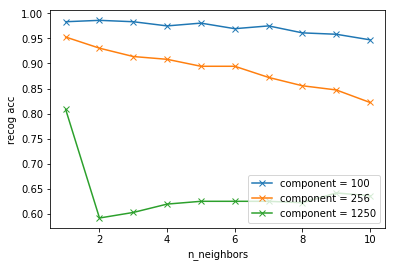

In [25]:
from sklearn.neighbors import KNeighborsClassifier
n_components = [100, 256, 1250]
fig, axes = plt.subplots()
legend = []
for cmpnt in n_components:
    pca = PCA(n_components=cmpnt, svd_solver='randomized', whiten=True, copy=True)
    pca.fit(X)
    X_pca = pca.transform(X)     # 执行pca变换得到的特征 
    X_test_pca = pca.transform(X_)
    n_neighbors=10

    nbrs_acc = []
    for nbr in range(1, n_neighbors+1):
        knn_clf = KNeighborsClassifier(n_neighbors=nbr)
        knn_clf.fit(X_pca, train_y)
        pred = knn_clf.predict(X_test_pca)
        acc = np.mean(np.equal(pred, test_y).astype(np.float32))
        nbrs_acc.append(acc)

    axes.set_xlabel('n_neighbors')
    axes.set_ylabel('recog acc')
    axes.plot(range(1, n_neighbors+1), nbrs_acc,'x-')
    legend.append('component = ' + str(cmpnt))
axes.legend(legend, loc=4)
# axes.scatter(range(1, n_neighbors+1), nbrs_acc) # 1代表scatter 点的大小 default=50


## 压缩图片重构
### 令n_components = 256做重构

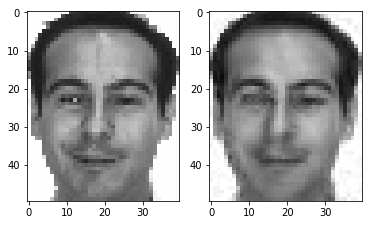

In [7]:
from PIL import Image
import matplotlib.pyplot as plt


n_components = 256
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True, copy=True)
pca.fit(X)
X_pca = pca.transform(X)     # 执行pca变换得到的特征 np.mat(eignmatrix, X)
X_rec = pca.inverse_transform(X_pca)
x_rec = np.reshape(X_rec[1],(50,40))

img_rec = Image.fromarray(x_rec)
img_ori = Image.fromarray(inputs[1])


plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_ori)
plt.subplot(1,2,2)
plt.imshow(img_rec)
plt.show()

### 令n_components = 8做重构

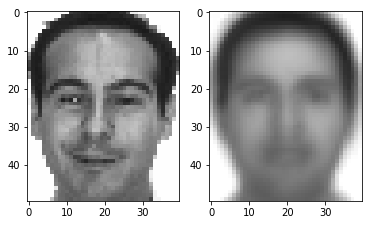

In [8]:
from PIL import Image
n_components = 8
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True, copy=True)
pca.fit(X)                   #PCA 的 copy 务必为True,否则pca.transform(X)中代码中会修改X
X_pca = pca.transform(X)     # 执行pca变换得到的特征 np.mat(eignmatrix, X)
X_rec = pca.inverse_transform(X_pca)
x_rec = np.reshape(X_rec[1],(50,40))

img_rec = Image.fromarray(x_rec)
img_ori = Image.fromarray(inputs[1])


plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_ori)
plt.subplot(1,2,2)
plt.imshow(img_rec)
plt.show()